In [1]:
import networkx as nx
import numpy as np

from tqdm import tnrange
from math import sqrt
from tqdm import tqdm

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
%matplotlib inline

import cv2

In [2]:
#Euclidian distance
def euclidean_distance(pos_1, pos_2):
    x1, y1 = pos_1[0], pos_1[1]
    x2, y2 = pos_2[0], pos_2[1]
    r = np.sqrt((x1-x2)**2+(y1-y2)**2)
    return r

In [3]:
def colorbar(mappable, size='5%', pad=0.05):
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size=size, pad=pad)
    return fig.colorbar(mappable, cax=cax)

In [4]:
def ls_dist(p1, p2, p3):
#     p1 = np.asarray(p1)
#     p2 = np.asarray(p2)
#     p3 = np.asarray(p3)
    
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3
    
    px = x2-x1
    py = y2-y1

    norm = px*px + py*py

    u =  ((x3 - x1) * px + (y3 - y1) * py) / float(norm)

    if u > 1:
        u = 1
    elif u < 0:
        u = 0

    x = x1 + u * px
    y = y1 + u * py

    dx = x - x3
    dy = y - y3

    # Note: If the actual distance does not matter,
    # if you only want to compare what this function
    # returns to other results of this function, you
    # can just return the squared distance instead
    # (i.e. remove the sqrt) to gain a little performance

    dist = sqrt(dx*dx + dy*dy)

    return dist, (x, y)

## Ground truth

Plot of the entire 'ground truth' maze with an example of a trial path for display

In [5]:
flower_graph = {1: [2, 6],
                2: [1, 3],
                3: [2, 4, 7],
                4: [3, 5],
                5: [4, 8],
                6: [1, 9, 17],
                7: [3, 9, 10],
                8: [5, 10, 11],
                9: [6, 7, 12],
                10: [7, 8, 13],
                11: [8, 14],
                12: [9, 15, 19],
                13: [10, 15, 16],
                14: [11, 16],
                15: [12, 13, 22],
                16: [13, 14, 24],
                17: [6, 18],
                18: [17, 19],
                19: [12, 18, 20],
                20: [19, 21],
                21: [20, 22],
                22: [15, 21, 23],
                23: [22, 24],
                24: [16, 23]}

In [6]:
ref_nodes = np.genfromtxt(r'C:\Users\Gebruiker\Documents\HexAnalysis\src\Resources\default\ref_nodes.csv', delimiter=',', skip_header=True)

node_positions = {}
with open(r'C:\Users\Gebruiker\Documents\HexAnalysis\src\Resources\default\ref_nodes.csv', 'r') as npf:
    next(npf)
    for line in npf:
        x, y, nn = map(str.strip, line.split(','))
        node_positions[int(nn)] = (int(float(x)), int(float(y)))

In [7]:
trial_1_data = np.genfromtxt(r'C:\Users\Gebruiker\Documents\HexAnalysis\data\processed\2019-01-16_10-45-35\trial_1\position_log_files\pos_log_file.csv', delimiter=',', skip_header=True)


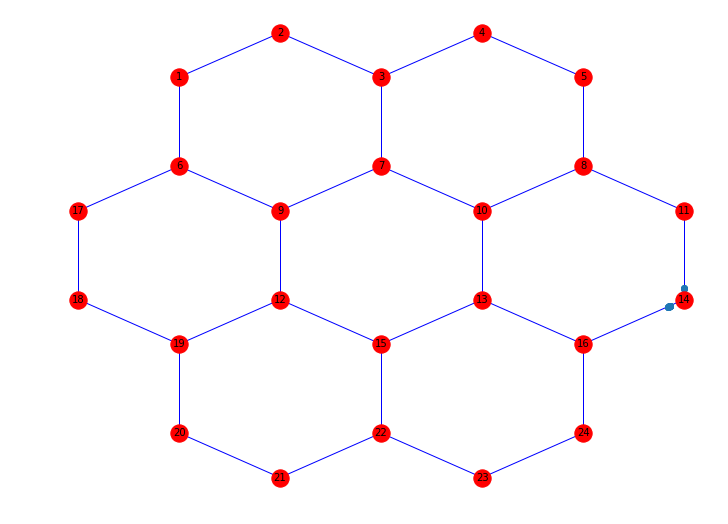

In [8]:
fig, ax = plt.subplots(figsize=(12,9))

# plt.scatter(trial_1_data[:,1], trial_1_data[:,2], color='green')

dat0 = np.genfromtxt(r'C:\Users\Gebruiker\Documents\HexAnalysis\Data\processed\2019-06-20_15-23-03\trial_26\position_log_files\pos_log_file_0.csv', delimiter=',', skip_header=True)
dat1 = np.genfromtxt(r'C:\Users\Gebruiker\Documents\HexAnalysis\Data\processed\2019-06-20_15-23-03\trial_26\position_log_files\pos_log_file_1.csv', delimiter=',', skip_header=True)

mg = nx.Graph(flower_graph)
nx.draw_networkx(mg, pos=node_positions, nodecolor='r', edge_color='b', alpha=1, font_size=10, marker_size=40)
plt.scatter(dat0[:,8], dat0[:,9])
plt.scatter(dat1[:,8], dat1[:,9], color='r')
# plt.text(1259+30,-990, 'Mapped mouse position', fontsize=14)
plt.axis('off');

## Distance map plots

Plots of the distance map (same concept as Ronny's plots)

## top

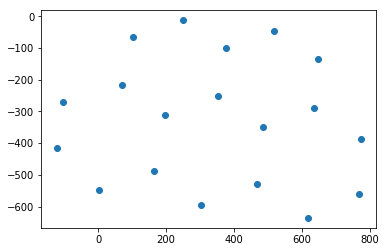

In [26]:
top_nodes = np.genfromtxt(r'C:\Users\Gebruiker\Documents\HexAnalysis\src\Resources\default\node_pos_top.csv', delimiter=',', skip_header=True)

plt.plot(top_nodes[:,0], -top_nodes[:,1], 'o')

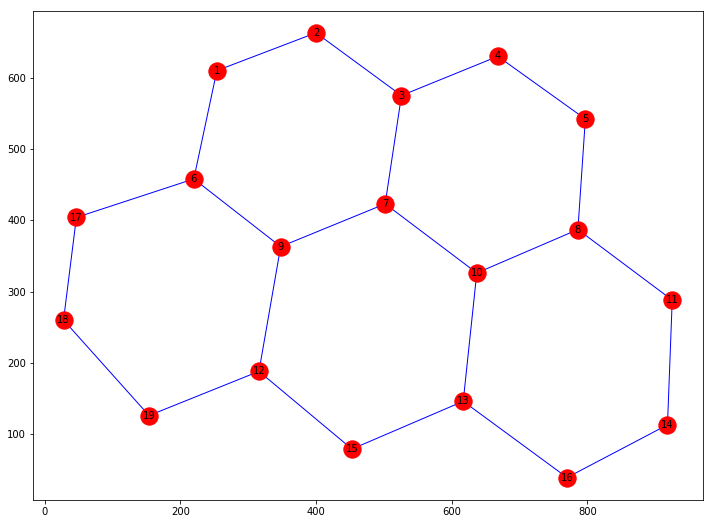

In [40]:
## top side

flower_graph = {1: [2, 6],
                2: [1, 3],
                3: [2, 4, 7],
                4: [3, 5],
                5: [4, 8],
                6: [1, 9, 17],
                7: [3, 9, 10],
                8: [5, 10, 11],
                9: [6, 7, 12],
                10: [7, 8, 13],
                11: [8, 14],
                12: [9, 15, 19],
                13: [10, 15, 16],
                14: [11, 16],
                15: [12, 13],
                16: [13, 14],
                17: [6, 18],
                18: [17, 19],
                19: [12, 18],}

node_positions = {}
with open(r'C:\Users\Gebruiker\Documents\HexAnalysis\src\Resources\default\node_pos_top.csv', 'r') as npf:
    next(npf)
    for line in npf:
        x, y, nn = map(str.strip, line.split(','))
        node_positions[int(nn)] = (int(float(x))+150, -int(float(y))+675)
        
fig, ax = plt.subplots(figsize=(12,9))

mg = nx.Graph(flower_graph)
nx.draw_networkx(mg, pos=node_positions, nodecolor='r', edge_color='b', alpha=1, font_size=10)

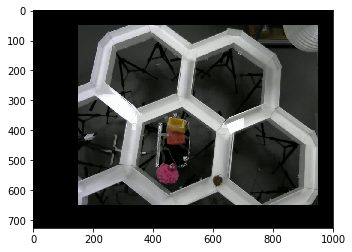

In [41]:
image = cv2.cvtColor(cv2.imread(r'C:\Users\Gebruiker\Documents\HexAnalysis\src\Resources\default\stand_0.png'), cv2.COLOR_BGR2RGB)
M = np.float32([[1,0, 150],[0,1, 50]])
image = cv2.warpAffine(image,M,(1000,725))
im = plt.imshow(image)

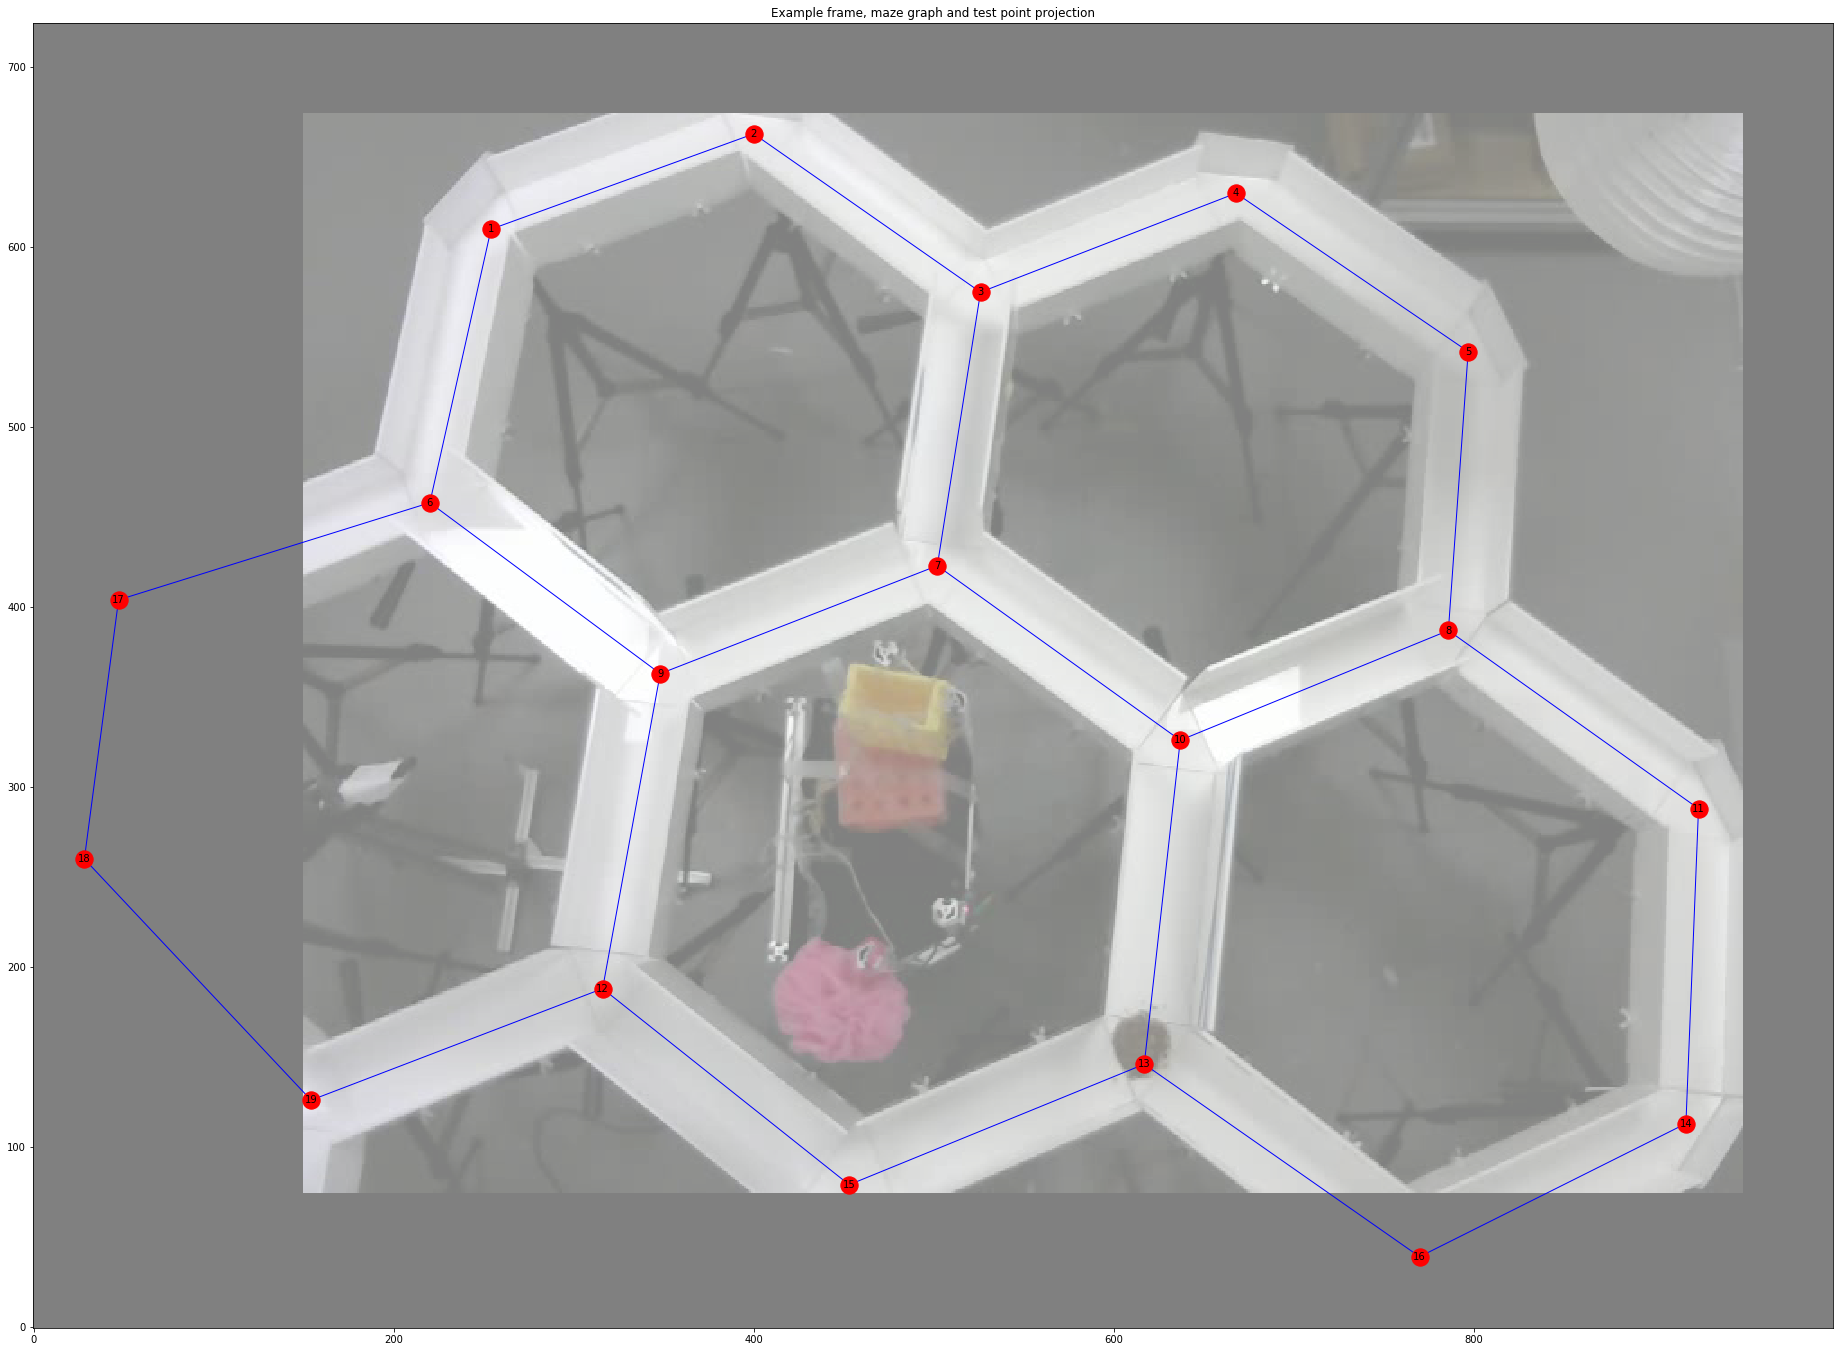

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(40, 24))

########################################## ROW 1
#### MAZE GRAPH
# maze image
p = (0, 0)
ax.imshow(np.flipud(image), alpha=.5)
ax.set_title(f'Example frame, maze graph and test point projection')

#### draw base maze graph
nx.draw_networkx(mg, pos=node_positions, nodecolor='r', edge_color='b', alpha=1, font_size=10, ax=ax)
ax.invert_yaxis()

In [43]:
org_shape = (725, 1000)
DIV = 1
red_shape = (725 // DIV, 1000 // DIV)

# edge maps
proj_edge_dist_map = np.zeros(red_shape)
proj_edge_id_map = np.zeros(red_shape)

# vertex maps
proj_vert_dist_map = np.zeros(red_shape)
proj_vert_id_map = np.zeros(red_shape)

edge_list = list(mg.edges)
vertex_list = list(node_positions.keys())
distances = np.zeros(len(edge_list))

for x in tnrange(proj_edge_dist_map.shape[0]):
    if x+1 in [1, 200, 400, 600, 725]:
        print('progress: {}'.format(x+1))
    for y in range(proj_edge_dist_map.shape[1]):
        test_p = (DIV*y, DIV*x)
        
        # Find closest edge with projection
        for n, edge in enumerate(edge_list):
            n1 = node_positions[edge[0]]
            n2 = node_positions[edge[1]]
            d, p4 = ls_dist(n1, n2, test_p)
            distances[n] = d
        closest_idx = distances.argmin()
        closest_edge = edge_list[closest_idx]

        # Find closest vertex from projection
        v1 = closest_edge[0]
        v2 = closest_edge[1]
        d1 = euclidean_distance(node_positions[v1], test_p)
        d2 = euclidean_distance(node_positions[v2], test_p)
        if d1 > d2:
            closest_vertex = v2
            second_closest_vertex = v1
        else:
            closest_vertex = v1
            second_closest_vertex = v2
            
        closest_vertex_idx = vertex_list.index(closest_vertex)
        
        proj_edge_id_map[x, y] = closest_idx
        proj_edge_dist_map[x, y] = distances.min()
        proj_vert_dist_map[x, y] = d1 if d1 < d2 else d2
        proj_vert_id_map[x, y] = closest_vertex_idx
        
np.save('cache/proj_edge_dist_map_top', proj_edge_dist_map)
np.save('cache/proj_edge_id_map_top', proj_edge_id_map)
np.save('cache/proj_vert_dist_map_top', proj_vert_dist_map)
np.save('cache/proj_vert_id_map_top', proj_vert_id_map)

progress: 1
progress: 200
progress: 400
progress: 600
progress: 725



In [44]:
org_shape = (725, 1000)
DIV = 1
red_shape = (725 // DIV, 1000 // DIV)

# edge maps
eucl_edge_dist_map = np.zeros(red_shape)
eucl_edge_id_map = np.zeros(red_shape)

# vertex maps
eucl_vert_dist_map = np.zeros(red_shape)
eucl_vert_id_map = np.zeros(red_shape)

edge_list = list(mg.edges)
vertex_list = list(node_positions.keys())
distances = np.zeros(len(edge_list))

for x in tnrange(red_shape[0]):
    if x+1 in [1, 200, 400, 600, 725]:
        print('progress: {}'.format(x+1))
    for y in range(red_shape[1]):
        test_p = (DIV*y, DIV*x)
        distances = [euclidean_distance((y * DIV, x * DIV), V) for V in node_positions.values()]
        dist_zip = sorted(zip(distances, node_positions.keys()))
        closest_vertex = dist_zip[0]
        second_closest_vertex = dist_zip[1]
        eucl_vert_dist_map[x, y] = closest_vertex[0]
        eucl_vert_id_map[x, y] = vertex_list.index(closest_vertex[1])
        
        closest_edge = (closest_vertex[1], second_closest_vertex[1])
        rev_closest_edge = (second_closest_vertex[1], closest_vertex[1])
        if closest_edge in edge_list:
            closest_edge_idx = edge_list.index(closest_edge)
        elif rev_closest_edge in edge_list:
            closest_edge_idx = edge_list.index(rev_closest_edge)
        else:
            closest_edge_idx = -1
        eucl_edge_id_map[x, y] = closest_edge_idx
        
np.save('cache/eucl_edge_dist_map_top', eucl_edge_dist_map)
np.save('cache/eucl_edge_id_map_top', eucl_edge_id_map)

np.save('cache/eucl_vert_dist_map_top', eucl_vert_dist_map)
np.save('cache/eucl_vert_id_map_top', eucl_vert_id_map)

progress: 1
progress: 200
progress: 400
progress: 600
progress: 725



In [112]:
eucl_edge_dist_map = np.load('cache/eucl_edge_dist_map_top.npy')
eucl_edge_id_map = np.load('cache/eucl_edge_id_map_top.npy')
eucl_vert_dist_map = np.load('cache/eucl_vert_dist_map_top.npy')
eucl_vert_id_map = np.load('cache/eucl_vert_id_map_top.npy')

proj_edge_id_map = np.load('cache/proj_edge_id_map_top.npy')
proj_edge_dist_map = np.load('cache/proj_edge_dist_map_top.npy')
proj_vert_dist_map = np.load('cache/proj_vert_dist_map_top.npy')
proj_vert_id_map = np.load('cache/proj_vert_id_map_top.npy')

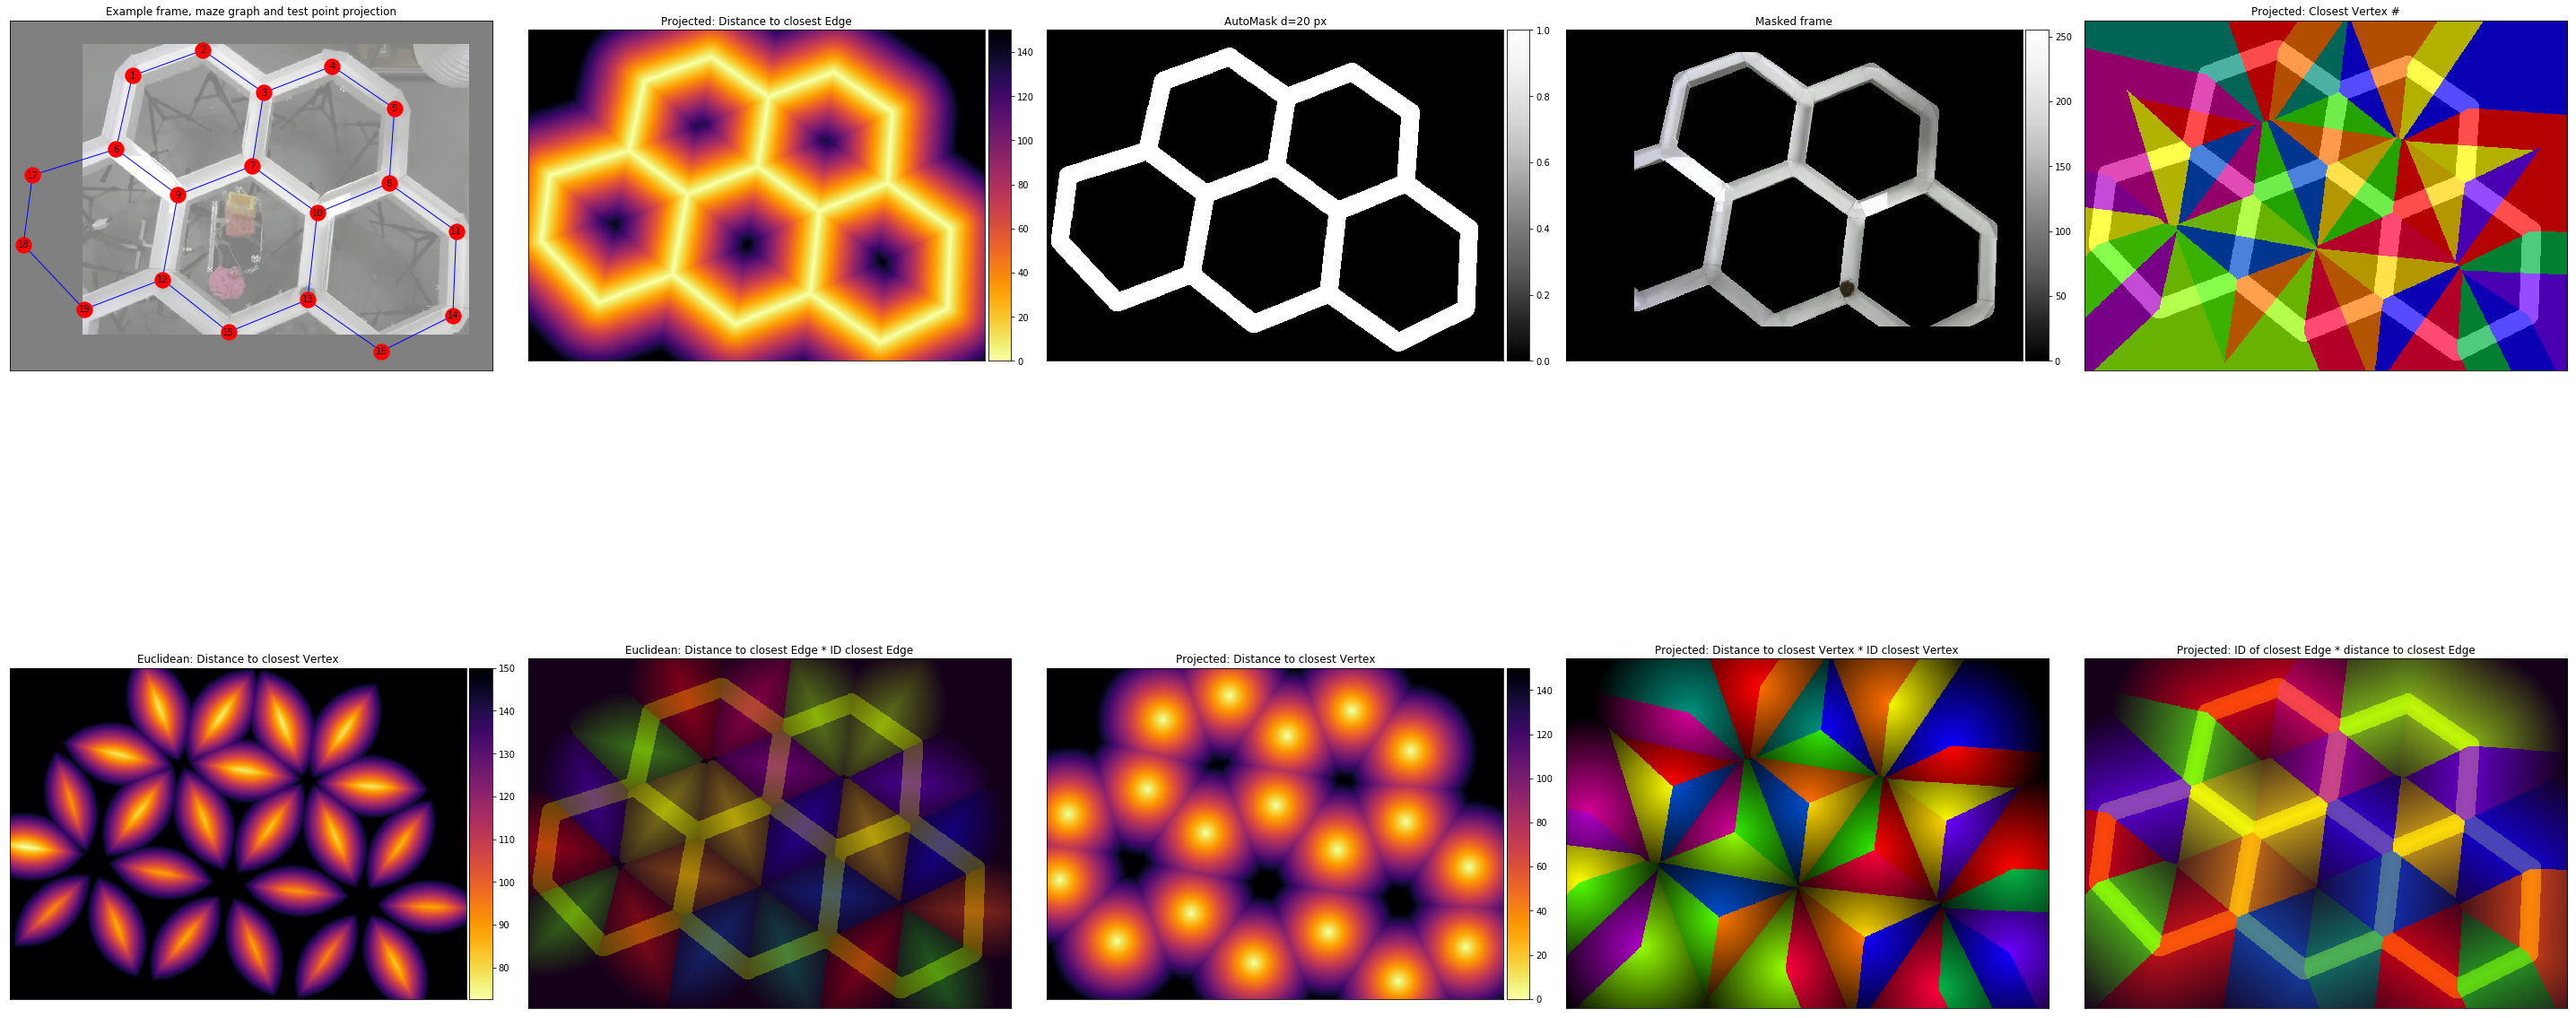

In [16]:
fig, ax = plt.subplots(2, 5, figsize=(40, 24))

edge_list = list(mg.edges)
distances = np.zeros((len(edge_list), 3))

########################################## ROW 1
#### MAZE GRAPH
# maze image
p = (0, 0)
ax[p].imshow(np.flipud(image), alpha=.5)
ax[p].set_title(f'Example frame, maze graph and test point projection')

#### draw base maze graph
nx.draw_networkx(mg, pos=node_positions, nodecolor='r', edge_color='b', alpha=1, font_size=10, ax=ax[p])
ax[p].invert_yaxis()

#### EDGE DISTANCE MAP
p = (0, 1)
im = ax[p].imshow(proj_edge_dist_map, cmap='inferno_r', vmax=150)
ax[p].set_title('Projected: Distance to closest Edge')
colorbar(im)
ax[p].invert_yaxis()

#### AUTOMASK
p = (0, 2)
dist_to_edge = 20
mask = np.array(proj_edge_dist_map < dist_to_edge, dtype='uint8')
im = ax[p].imshow(mask, cmap='Greys_r')
ax[p].set_title(f'AutoMask d={dist_to_edge} px')
colorbar(im)
ax[p].invert_yaxis()

# Store mask to disk
cv2.imwrite('img/automask.png', mask*255)

#### Masked Arena
p = (0, 3)
im = ax[p].imshow(cv2.bitwise_and(np.flipud(image), np.flipud(image), mask=mask), cmap='Greys_r')
ax[p].invert_yaxis()
ax[p].set_title(f'Masked frame')
colorbar(im)

#### Closest node ID MAP
p = (0, 4)
im = ax[p].imshow(proj_vert_id_map, cmap='prism')
ax[p].imshow(mask, cmap='Greys_r', alpha=.3)
ax[p].set_title('Projected: Closest Vertex #')
# colorbar(im)
ax[p].invert_yaxis()

########################################## ROW 2
#### EUCLIDEAN NODE DISTANCE MAP
p = (1, 0)
im = ax[p].imshow(eucl_vert_dist_map, cmap='inferno_r', vmax=150)
ax[p].set_title('Euclidean: Distance to closest Vertex')
colorbar(im)
ax[p].invert_yaxis()

#### Euclidean Closest edge ID AND edge distance map
p = (1, 1)
eucl_edge_id_blacked = cm.get_cmap('prism')(eucl_edge_id_map/eucl_edge_id_map.max())[:, :, :3]
eucl_edge_id_blacked[eucl_edge_id_map==-1, :] = (0, 0, 0)

clipped_dist_to_edge = np.abs(np.clip(eucl_vert_dist_map, a_min=0, a_max=200) / 200 - 1)
# arr = cm.get_cmap('prism')(eucl_edge_id_blacked/eucl_edge_id_blacked.max())[:, :, :3]
arr = (eucl_edge_id_blacked.T * clipped_dist_to_edge.T).T

ax[p].imshow(arr)
ax[p].imshow(mask, alpha=.3)
ax[p].set_title('Euclidean: Distance to closest Edge * ID closest Edge')
ax[p].invert_yaxis()

#### PROJ NODE DISTANCE MAP
p = (1, 2)
im = ax[p].imshow(proj_vert_dist_map, cmap='inferno_r', vmax=150)
ax[p].set_title('Projected: Distance to closest Vertex')
colorbar(im)
ax[p].invert_yaxis()

#### Closest Node ID AND node distance map
p = (1, 3)
clipped_dist_to_node = np.abs(np.clip(proj_vert_dist_map, a_min=0, a_max=200) / 200 - 1)
arr = cm.get_cmap('prism')(proj_vert_id_map/proj_vert_id_map.max())[:, :, :3]
im = ax[p].imshow((arr.T * clipped_dist_to_node.T).T)
ax[p].set_title('Projected: Distance to closest Vertex * ID closest Vertex')
ax[p].invert_yaxis()

#### Closest edge ID AND edge distance map
p = (1, 4)
clipped_dist_to_edge = np.abs(np.clip(proj_edge_dist_map, a_min=0, a_max=200) / 200 - 1)
arr = cm.get_cmap('prism')(proj_edge_id_map/proj_edge_id_map.max())[:, :, :3]
arr = (arr.T * clipped_dist_to_edge.T).T
im = ax[p].imshow(arr)
ax[p].imshow(mask, alpha=.3)
ax[p].set_title('Projected: ID of closest Edge * distance to closest Edge')
ax[p].invert_yaxis()

for axs in [(a, b) for a in range(ax.shape[0]) for b in range(ax.shape[1])]:
    ax[axs].set_xticks([])
    ax[axs].set_yticks([])
    
plt.tight_layout()
# plt.savefig('rhm_graph_dist_map_top.png', dpi=100)

## Bottom

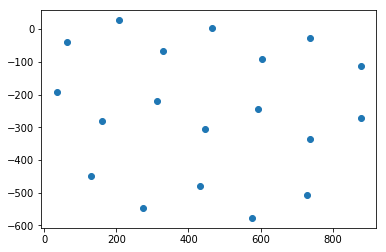

In [31]:
bot_nodes = np.genfromtxt(r'C:\Users\Gebruiker\Documents\HexAnalysis\src\Resources\default\node_pos_bottom.csv', delimiter=',', skip_header=True)

plt.plot(bot_nodes[:,0], -bot_nodes[:,1], 'o')

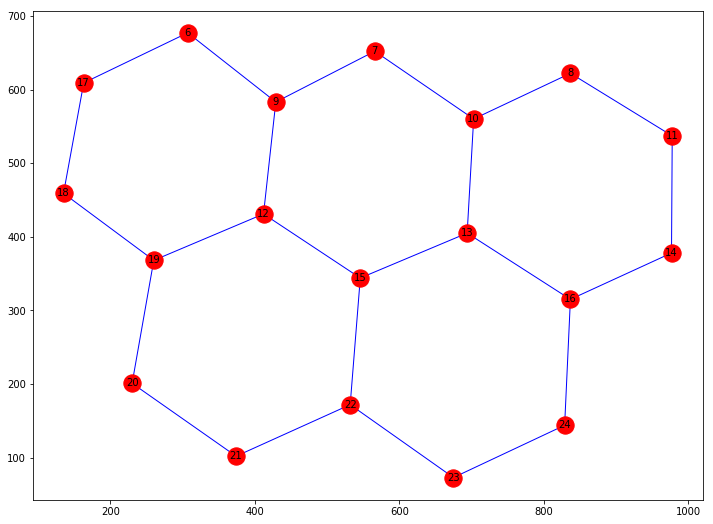

In [45]:
## top side

flower_graph = {6: [9, 17],
                7: [9, 10],
                8: [10, 11],
                9: [6, 7, 12],
                10: [7, 8, 13],
                11: [8, 14],
                12: [9, 15, 19],
                13: [10, 15, 16],
                14: [11, 16],
                15: [12, 13, 22],
                16: [13, 14, 24],
                17: [6, 18],
                18: [17, 19],
                19: [12, 18, 20],
                20: [19, 21],
                21: [20, 22],
                22: [15, 21, 23],
                23: [22, 24],
                24: [16, 23]}

node_positions = {}
with open(r'C:\Users\Gebruiker\Documents\HexAnalysis\src\Resources\default\node_pos_bottom.csv', 'r') as npf:
    next(npf)
    for line in npf:
        x, y, nn = map(str.strip, line.split(','))
        node_positions[int(nn)] = (int(float(x))+100, -int(float(y))+650)
        
fig, ax = plt.subplots(figsize=(12,9))

mg = nx.Graph(flower_graph)
nx.draw_networkx(mg, pos=node_positions, nodecolor='r', edge_color='b', alpha=1, font_size=10)

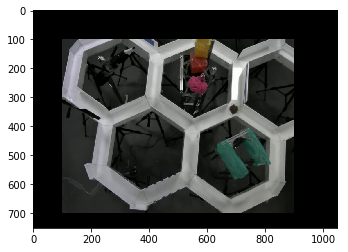

In [46]:
image = cv2.cvtColor(cv2.imread(r'C:\Users\Gebruiker\Documents\HexAnalysis\src\Resources\default\stand_1.png'), cv2.COLOR_BGR2RGB)
M = np.float32([[1,0, 100],[0,1, 100]])
image = cv2.warpAffine(image,M,(1050,750))
im = plt.imshow(image)

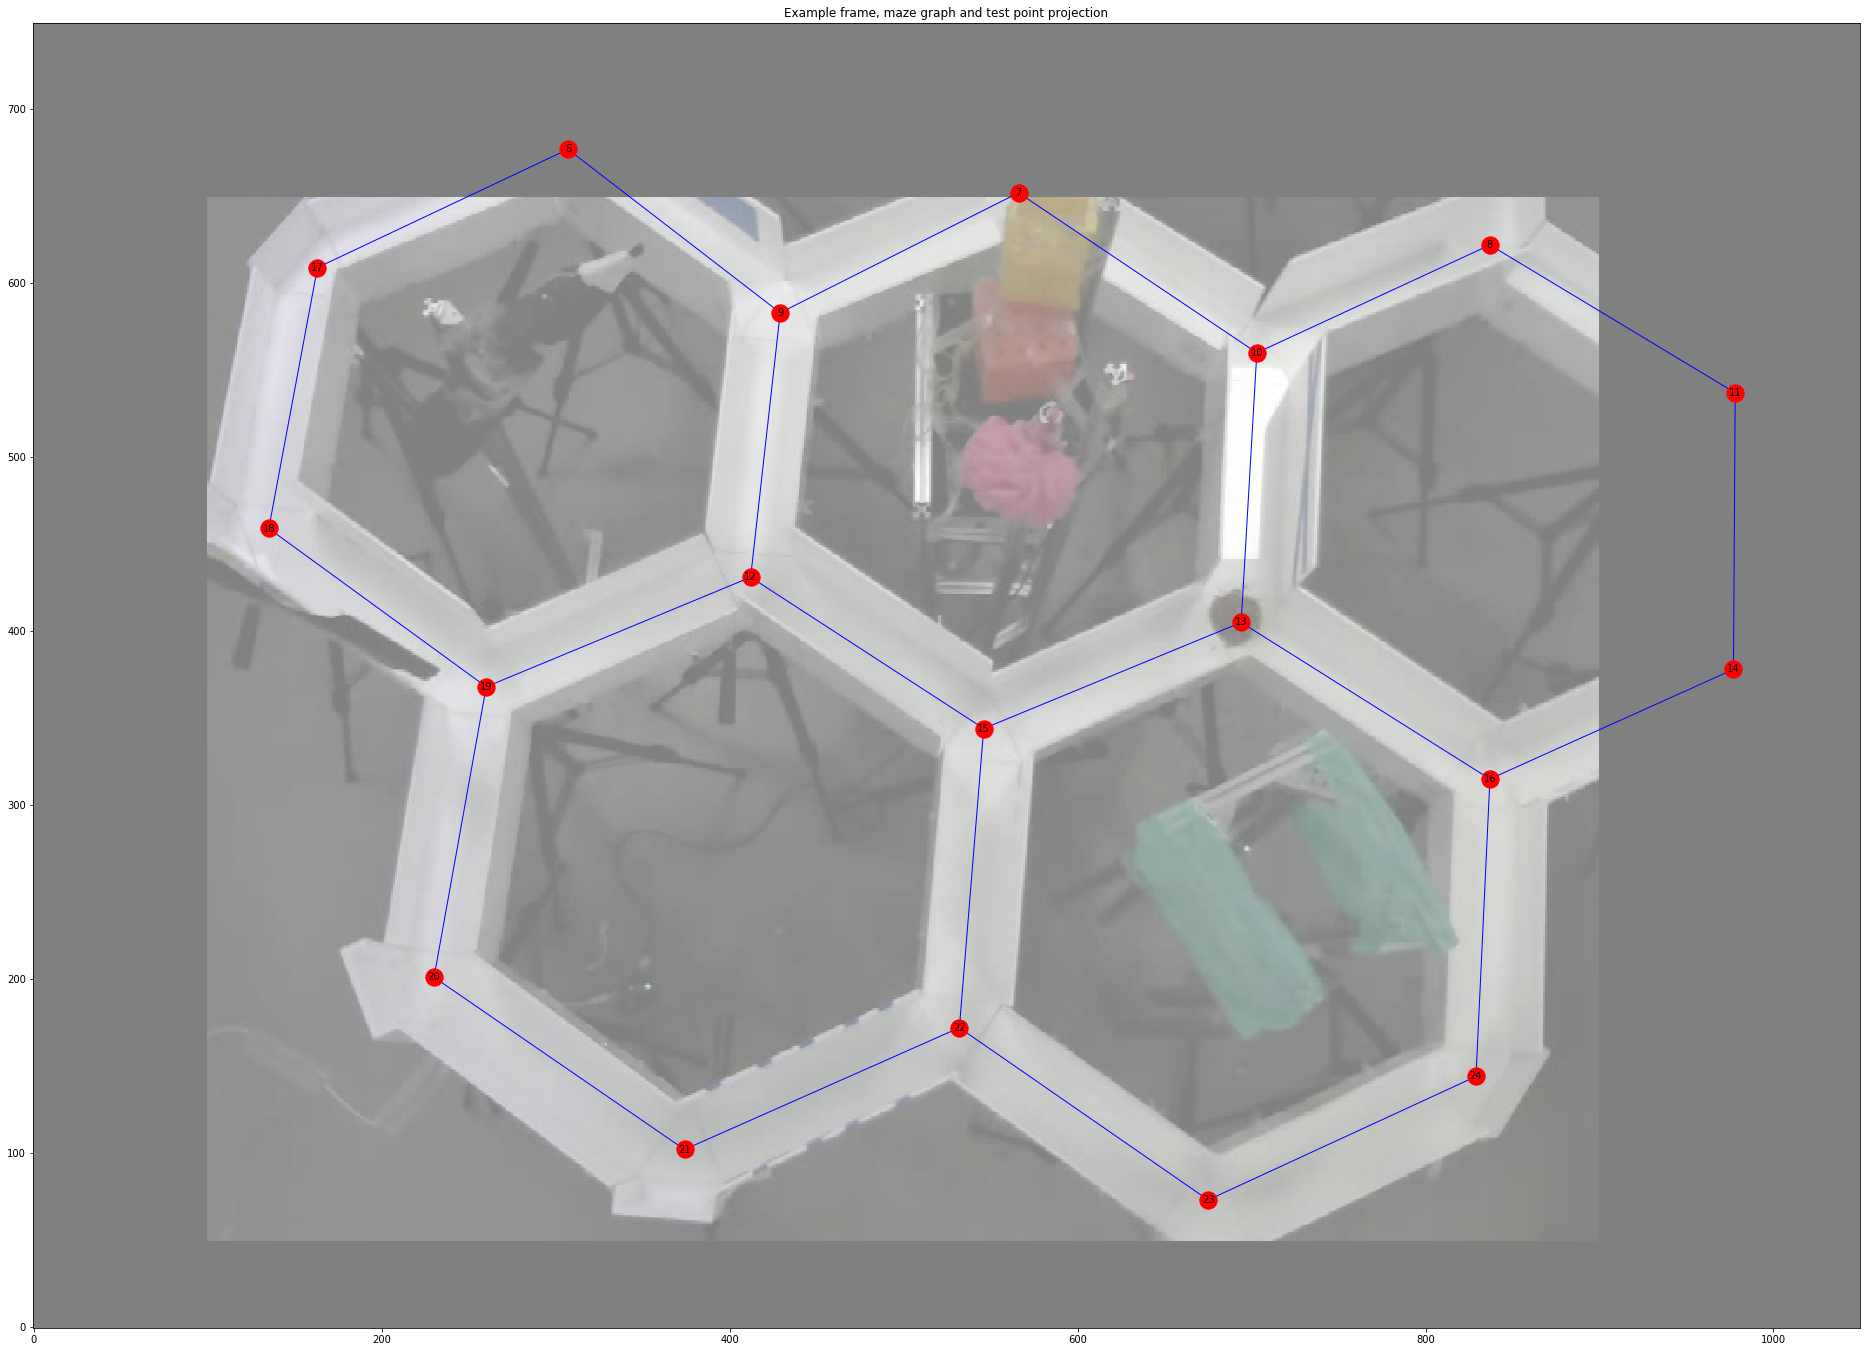

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(40, 24))

########################################## ROW 1
#### MAZE GRAPH
# maze image
p = (0, 0)
ax.imshow(np.flipud(image), alpha=.5)
ax.set_title(f'Example frame, maze graph and test point projection')

#### draw base maze graph
nx.draw_networkx(mg, pos=node_positions, nodecolor='r', edge_color='b', alpha=1, font_size=10, ax=ax)
ax.invert_yaxis()

In [48]:
org_shape = (750, 1050)
DIV = 1
red_shape = (750 // DIV, 1050 // DIV)

# edge maps
proj_edge_dist_map = np.zeros(red_shape)
proj_edge_id_map = np.zeros(red_shape)

# vertex maps
proj_vert_dist_map = np.zeros(red_shape)
proj_vert_id_map = np.zeros(red_shape)

edge_list = list(mg.edges)
vertex_list = list(node_positions.keys())
distances = np.zeros(len(edge_list))

for x in tnrange(proj_edge_dist_map.shape[0]):
    if x+1 in [1, 200, 400, 600, 750]:
        print('progress: {}'.format(x+1))
    for y in range(proj_edge_dist_map.shape[1]):
        test_p = (DIV*y, DIV*x)
        
        # Find closest edge with projection
        for n, edge in enumerate(edge_list):
            n1 = node_positions[edge[0]]
            n2 = node_positions[edge[1]]
            d, p4 = ls_dist(n1, n2, test_p)
            distances[n] = d
        closest_idx = distances.argmin()
        closest_edge = edge_list[closest_idx]

        # Find closest vertex from projection
        v1 = closest_edge[0]
        v2 = closest_edge[1]
        d1 = euclidean_distance(node_positions[v1], test_p)
        d2 = euclidean_distance(node_positions[v2], test_p)
        if d1 > d2:
            closest_vertex = v2
            second_closest_vertex = v1
        else:
            closest_vertex = v1
            second_closest_vertex = v2
            
        closest_vertex_idx = vertex_list.index(closest_vertex)
        
        proj_edge_id_map[x, y] = closest_idx
        proj_edge_dist_map[x, y] = distances.min()
        proj_vert_dist_map[x, y] = d1 if d1 < d2 else d2
        proj_vert_id_map[x, y] = closest_vertex_idx
        
np.save('cache/proj_edge_dist_map_bot', proj_edge_dist_map)
np.save('cache/proj_edge_id_map_bot', proj_edge_id_map)
np.save('cache/proj_vert_dist_map_bot', proj_vert_dist_map)
np.save('cache/proj_vert_id_map_bot', proj_vert_id_map)

progress: 1
progress: 200
progress: 400
progress: 600
progress: 750



In [49]:
org_shape = (750, 1050)
DIV = 1
red_shape = (750 // DIV, 1050 // DIV)

# edge maps
eucl_edge_dist_map = np.zeros(red_shape)
eucl_edge_id_map = np.zeros(red_shape)

# vertex maps
eucl_vert_dist_map = np.zeros(red_shape)
eucl_vert_id_map = np.zeros(red_shape)

edge_list = list(mg.edges)
vertex_list = list(node_positions.keys())
distances = np.zeros(len(edge_list))

for x in tnrange(red_shape[0]):
    if x+1 in [1, 200, 400, 600, 750]:
        print('progress: {}'.format(x+1))
    for y in range(red_shape[1]):
        test_p = (DIV*y, DIV*x)
        distances = [euclidean_distance((y * DIV, x * DIV), V) for V in node_positions.values()]
        dist_zip = sorted(zip(distances, node_positions.keys()))
        closest_vertex = dist_zip[0]
        second_closest_vertex = dist_zip[1]
        eucl_vert_dist_map[x, y] = closest_vertex[0]
        eucl_vert_id_map[x, y] = vertex_list.index(closest_vertex[1])
        
        closest_edge = (closest_vertex[1], second_closest_vertex[1])
        rev_closest_edge = (second_closest_vertex[1], closest_vertex[1])
        if closest_edge in edge_list:
            closest_edge_idx = edge_list.index(closest_edge)
        elif rev_closest_edge in edge_list:
            closest_edge_idx = edge_list.index(rev_closest_edge)
        else:
            closest_edge_idx = -1
        eucl_edge_id_map[x, y] = closest_edge_idx
        
np.save('cache/eucl_edge_dist_map_bot', eucl_edge_dist_map)
np.save('cache/eucl_edge_id_map_bot', eucl_edge_id_map)

np.save('cache/eucl_vert_dist_map_bot', eucl_vert_dist_map)
np.save('cache/eucl_vert_id_map_bot', eucl_vert_id_map)

progress: 1
progress: 200
progress: 400
progress: 600
progress: 750



In [81]:
eucl_edge_dist_map = np.load('cache/eucl_edge_dist_map_bot.npy')
eucl_edge_id_map = np.load('cache/eucl_edge_id_map_bot.npy')
eucl_vert_dist_map = np.load('cache/eucl_vert_dist_map_bot.npy')
eucl_vert_id_map = np.load('cache/eucl_vert_id_map_bot.npy')

proj_edge_id_map = np.load('cache/proj_edge_id_map_bot.npy')
proj_edge_dist_map = np.load('cache/proj_edge_dist_map_bot.npy')
proj_vert_dist_map = np.load('cache/proj_vert_dist_map_bot.npy')
proj_vert_id_map = np.load('cache/proj_vert_id_map_bot.npy')

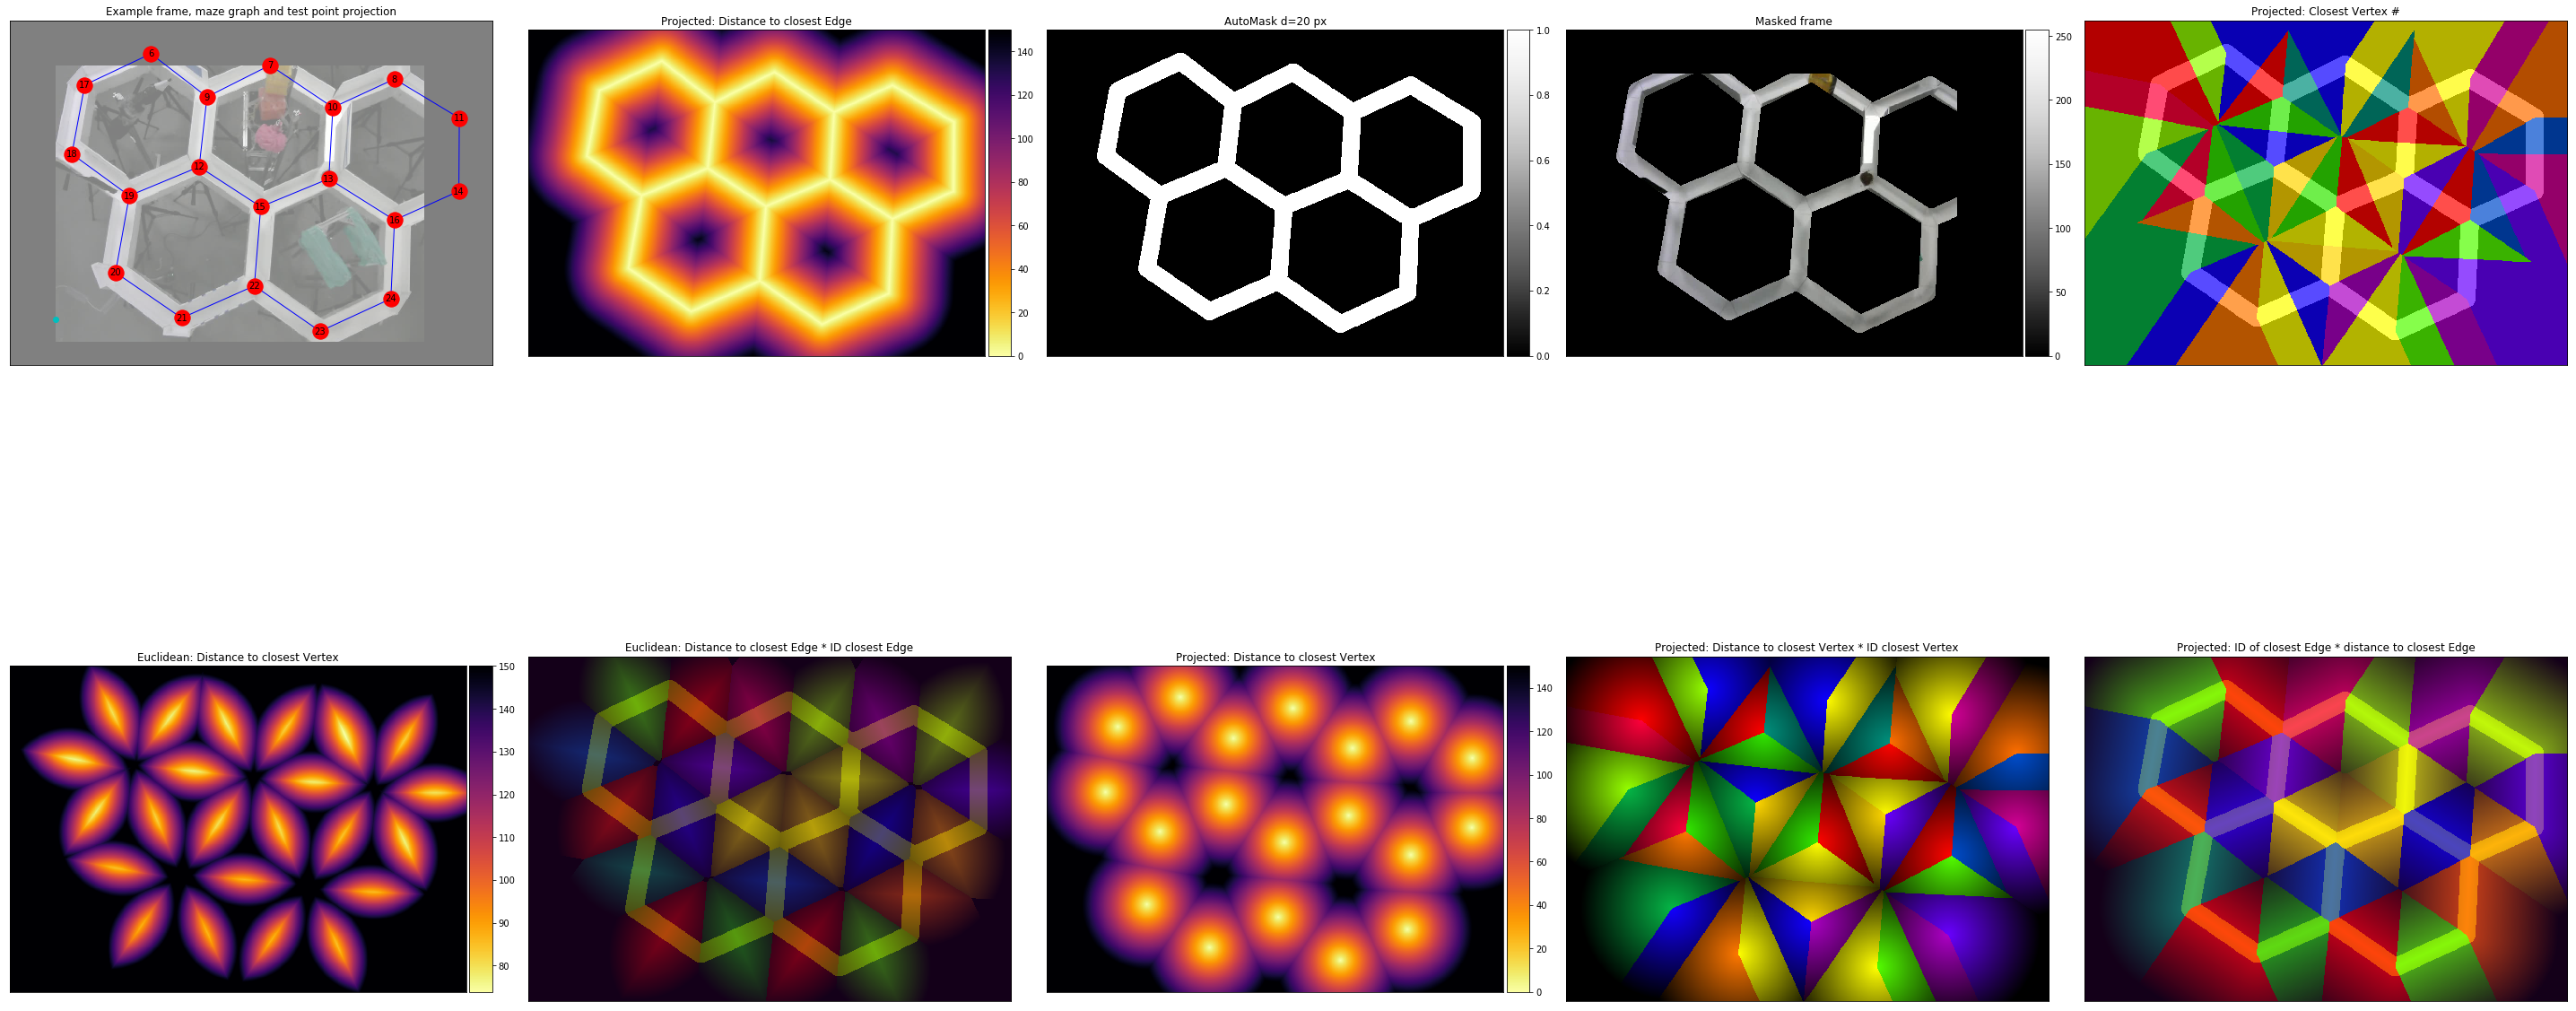

In [19]:
fig, ax = plt.subplots(2, 5, figsize=(40, 24))

edge_list = list(mg.edges)
distances = np.zeros((len(edge_list), 3))

########################################## ROW 1
#### MAZE GRAPH
# maze image
p = (0, 0)
ax[p].imshow(np.flipud(image), alpha=.5)
ax[p].set_title(f'Example frame, maze graph and test point projection')

# draw test point case
test_p = (100, 100)
ax[p].scatter(test_p[0], test_p[1], c='c')

#### draw base maze graph
nx.draw_networkx(mg, pos=node_positions, nodecolor='r', edge_color='b', alpha=1, font_size=10, ax=ax[p])
ax[p].invert_yaxis()

#### EDGE DISTANCE MAP
p = (0, 1)
im = ax[p].imshow(proj_edge_dist_map, cmap='inferno_r', vmax=150)
ax[p].set_title('Projected: Distance to closest Edge')
colorbar(im)
ax[p].invert_yaxis()

#### AUTOMASK
p = (0, 2)
dist_to_edge = 20
mask = np.array(proj_edge_dist_map < dist_to_edge, dtype='uint8')
im = ax[p].imshow(mask, cmap='Greys_r')
ax[p].set_title(f'AutoMask d={dist_to_edge} px')
colorbar(im)
ax[p].invert_yaxis()

# Store mask to disk
cv2.imwrite('img/automask.png', mask*255)

#### Masked Arena
p = (0, 3)
im = ax[p].imshow(cv2.bitwise_and(np.flipud(image), np.flipud(image), mask=mask), cmap='Greys_r')
ax[p].invert_yaxis()
ax[p].set_title(f'Masked frame')
colorbar(im)

#### Closest node ID MAP
p = (0, 4)
im = ax[p].imshow(proj_vert_id_map, cmap='prism')
ax[p].imshow(mask, cmap='Greys_r', alpha=.3)
ax[p].set_title('Projected: Closest Vertex #')
# colorbar(im)
ax[p].invert_yaxis()

########################################## ROW 2
#### EUCLIDEAN NODE DISTANCE MAP
p = (1, 0)
im = ax[p].imshow(eucl_vert_dist_map, cmap='inferno_r', vmax=150)
ax[p].set_title('Euclidean: Distance to closest Vertex')
colorbar(im)
ax[p].invert_yaxis()

#### Euclidean Closest edge ID AND edge distance map
p = (1, 1)
eucl_edge_id_blacked = cm.get_cmap('prism')(eucl_edge_id_map/eucl_edge_id_map.max())[:, :, :3]
eucl_edge_id_blacked[eucl_edge_id_map==-1, :] = (0, 0, 0)

clipped_dist_to_edge = np.abs(np.clip(eucl_vert_dist_map, a_min=0, a_max=200) / 200 - 1)
# arr = cm.get_cmap('prism')(eucl_edge_id_blacked/eucl_edge_id_blacked.max())[:, :, :3]
arr = (eucl_edge_id_blacked.T * clipped_dist_to_edge.T).T

ax[p].imshow(arr)
ax[p].imshow(mask, alpha=.3)
ax[p].set_title('Euclidean: Distance to closest Edge * ID closest Edge')
ax[p].invert_yaxis()

#### PROJ NODE DISTANCE MAP
p = (1, 2)
im = ax[p].imshow(proj_vert_dist_map, cmap='inferno_r', vmax=150)
ax[p].set_title('Projected: Distance to closest Vertex')
colorbar(im)
ax[p].invert_yaxis()

#### Closest Node ID AND node distance map
p = (1, 3)
clipped_dist_to_node = np.abs(np.clip(proj_vert_dist_map, a_min=0, a_max=200) / 200 - 1)
arr = cm.get_cmap('prism')(proj_vert_id_map/proj_vert_id_map.max())[:, :, :3]
im = ax[p].imshow((arr.T * clipped_dist_to_node.T).T)
ax[p].set_title('Projected: Distance to closest Vertex * ID closest Vertex')
ax[p].invert_yaxis()

#### Closest edge ID AND edge distance map
p = (1, 4)
clipped_dist_to_edge = np.abs(np.clip(proj_edge_dist_map, a_min=0, a_max=200) / 200 - 1)
arr = cm.get_cmap('prism')(proj_edge_id_map/proj_edge_id_map.max())[:, :, :3]
arr = (arr.T * clipped_dist_to_edge.T).T
im = ax[p].imshow(arr)
ax[p].imshow(mask, alpha=.3)
ax[p].set_title('Projected: ID of closest Edge * distance to closest Edge')
ax[p].invert_yaxis()

for axs in [(a, b) for a in range(ax.shape[0]) for b in range(ax.shape[1])]:
    ax[axs].set_xticks([])
    ax[axs].set_yticks([])
plt.tight_layout()
plt.savefig('rhm_graph_dist_map_bot.png', dpi=100)